In [217]:
%run ../collect.py --root_dir=/Users/yangjunjie/work/fftisdf-for-dmet/fftisdf-with-dmet-main/benchmark/kuhf-dmet/nio-afm --filename=out.log --output=../data/nio-afm-kuhf-dmet.json
%run ../collect.py --root_dir=/Users/yangjunjie/work/fftisdf-for-dmet/fftisdf-with-dmet-main/benchmark/kuhf-dmet/nio-fm --filename=out.log --output=../data/nio-fm-kuhf-dmet.json

In [218]:
import os, sys, json
import pandas as pd

def load_data(f):
    # Load the JSON data as a dictionary first
    with open(f, 'r') as file:
        data = json.load(file)
    
    # Convert the nested dictionary to a list of records
    records = []
    for path, params in data.items():
        # Add the path as a field and merge with params
        record = {'path': path, **params}
        records.append(record)
    
    # Create DataFrame from records
    return pd.DataFrame(records)

data_nio_afm_kuhf_dmet = load_data("../data/nio-afm-kuhf-dmet.json")
# print(data_nio_afm_kuhf_dmet)

data_nio_fm_kuhf_dmet = load_data("../data/nio-fm-kuhf-dmet.json")
print(data_nio_fm_kuhf_dmet)


                                                 path          method  \
0   /Users/yangjunjie/work/fftisdf-for-dmet/fftisd...  fftisdf-180-25   
1   /Users/yangjunjie/work/fftisdf-for-dmet/fftisd...         gdf-2.0   
2   /Users/yangjunjie/work/fftisdf-for-dmet/fftisd...  fftisdf-180-25   
3   /Users/yangjunjie/work/fftisdf-for-dmet/fftisd...         gdf-2.0   
4   /Users/yangjunjie/work/fftisdf-for-dmet/fftisd...  fftisdf-180-25   
5   /Users/yangjunjie/work/fftisdf-for-dmet/fftisd...         gdf-2.0   
6   /Users/yangjunjie/work/fftisdf-for-dmet/fftisd...  fftisdf-180-25   
7   /Users/yangjunjie/work/fftisdf-for-dmet/fftisd...         gdf-2.0   
8   /Users/yangjunjie/work/fftisdf-for-dmet/fftisd...  fftisdf-180-25   
9   /Users/yangjunjie/work/fftisdf-for-dmet/fftisd...         gdf-2.0   
10  /Users/yangjunjie/work/fftisdf-for-dmet/fftisd...  fftisdf-180-25   
11  /Users/yangjunjie/work/fftisdf-for-dmet/fftisd...         gdf-2.0   
12  /Users/yangjunjie/work/fftisdf-for-dmet/fftisd.

In [219]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams["text.latex.preamble"] = r"\usepackage{color}\usepackage{colortbl}"

from pathlib import Path

figpath = Path("/Users/yangjunjie/Desktop/fftisdf-embedding/fig/")
assert figpath.exists()

from matplotlib.colors import TABLEAU_COLORS
colors = list(TABLEAU_COLORS)

markersize = 4
s = (markersize / 2) ** 2 * 3.14


             gdf-2.0, ene_kuhf = -366.756108
             gdf-2.0, ene_kuhf = -366.754060
      fftisdf-180-25, ene_kuhf = -366.756200
      fftisdf-180-25, ene_kuhf = -366.754455


/var/folders/sm/7t_ndz1j5n5dlj8m6tnm2h480000gn/T/ipykernel_97214/1642703722.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.sort_values(by='nkpt', inplace=True)
/var/folders/sm/7t_ndz1j5n5dlj8m6tnm2h480000gn/T/ipykernel_97214/1642703722.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.sort_values(by='nkpt', inplace=True)


(0.0, 0.06)

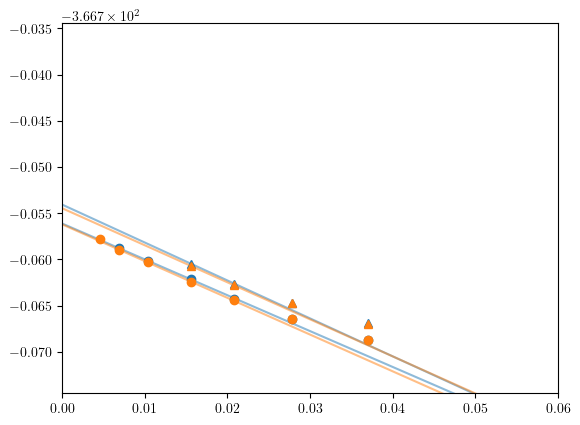

In [220]:
fig, ax = plt.subplots(1, 1)

method = ['gdf-2.0', 'fftisdf-180-25']

for mi, mm in enumerate(method):
    m = method[0]
    d = data_nio_afm_kuhf_dmet[data_nio_afm_kuhf_dmet['method'] == mm]
    d.sort_values(by='nkpt', inplace=True)

    x0 = d['nkpt'].values
    y0 = d['ene_kuhf'].values

    ax.plot(1 / x0, y0, marker='o', linestyle='', label=m, color=colors[mi])

    import numpy as np
    x = (1 / x0)[-4:-1]
    y = y0[-4:-1]

    r = np.polyfit(x, y, 1)
    p = np.poly1d(r)
    x = np.linspace(0, 0.06, 100)
    y = p(x)
    ax.plot(x, y, marker='', linestyle='-', color=colors[mi], alpha=0.5)
    ax.set_ylim(r[1] - 0.02, r[1] + 0.02)

    print("%20s, ene_kuhf = %f" % (mm, r[1]))

    d = data_nio_fm_kuhf_dmet[data_nio_fm_kuhf_dmet['method'] == mm]
    d.sort_values(by='nkpt', inplace=True)

    x0 = d['nkpt'].values
    y0 = d['ene_kuhf'].values

    ax.plot(1 / x0, y0, marker='^', linestyle='', label=m, color=colors[mi])

    import numpy as np
    x = (1 / x0)[-2:]
    y = y0[-2:]

    r = np.polyfit(x, y, 1)
    p = np.poly1d(r)
    x = np.linspace(0, 0.06, 100)
    y = p(x)
    ax.plot(x, y, marker='', linestyle='-', color=colors[mi], alpha=0.5)
    ax.set_ylim(r[1] - 0.02, r[1] + 0.02)

    print("%20s, ene_kuhf = %f" % (mm, r[1]))

ax.set_xlim(0, 0.06)

             gdf-2.0, ene_kuhf = -367.370313
      fftisdf-180-25, ene_kuhf = -367.368983


/var/folders/sm/7t_ndz1j5n5dlj8m6tnm2h480000gn/T/ipykernel_97214/3596486905.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.sort_values(by='nkpt', inplace=True)


(0.0, 0.06)

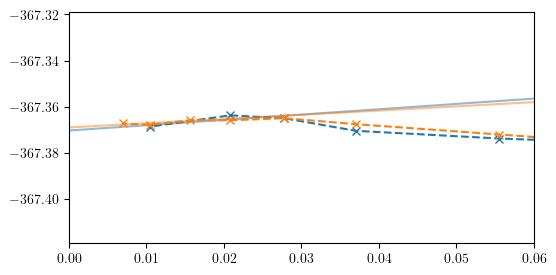

In [221]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))

method = ['gdf-2.0', 'fftisdf-180-25']

for mi, mm in enumerate(method):
    m = method[0]
    d = data_nio_afm_kuhf_dmet[data_nio_afm_kuhf_dmet['method'] == mm]
    d.sort_values(by='nkpt', inplace=True)

    # get indices of the non-nan values
    non_nan_indices = ~np.isnan(d['ene_dmet'].values)
    x0 = 1 / d['nkpt'].values[non_nan_indices]
    y0 = d['ene_dmet'].values[non_nan_indices]

    ax.plot(x0, y0, marker='x', linestyle='--', label=m, color=colors[mi])

    import numpy as np
    x = x0[-3:]
    y = y0[-3:]

    r = np.polyfit(x, y, 1)
    p = np.poly1d(r)
    x = np.linspace(0, 0.06, 100)
    y = p(x)
    ax.plot(x, y, marker='', linestyle='-', color=colors[mi], alpha=0.5)
    ax.set_ylim(r[1] - 0.05, r[1] + 0.05)

    print("%20s, ene_kuhf = %f" % (mm, r[1]))

ax.set_xlim(0, 0.06)

/var/folders/sm/7t_ndz1j5n5dlj8m6tnm2h480000gn/T/ipykernel_97214/3894950237.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.sort_values(by='nkpt', inplace=True)


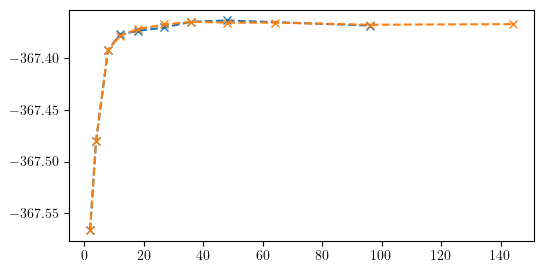

In [222]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))

method = ['gdf-2.0', 'fftisdf-180-25']

for mi, mm in enumerate(method):
    m = method[0]
    d = data_nio_afm_kuhf_dmet[data_nio_afm_kuhf_dmet['method'] == mm]
    d.sort_values(by='nkpt', inplace=True)

    # get indices of the non-nan values
    non_nan_indices = ~np.isnan(d['ene_dmet'].values)
    x0 = d['nkpt'].values[non_nan_indices]
    y0 = d['ene_dmet'].values[non_nan_indices]

    ax.plot(x0, y0, marker='x', linestyle='--', label=m, color=colors[mi])

#     import numpy as np
#     x = x0[-3:]
#     y = y0[-3:]

#     r = np.polyfit(x, y, 1)
#     p = np.poly1d(r)
#     x = np.linspace(0, 0.06, 100)
#     y = p(x)
#     ax.plot(x, y, marker='', linestyle='-', color=colors[mi], alpha=0.5)
#     ax.set_ylim(r[1] - 0.05, r[1] + 0.05)

#     print("%20s, ene_kuhf = %f" % (mm, r[1]))

# ax.set_xlim(0, 0.06)